# Classificador Spotify 

### Integrantes:
* `Andresa Bicudo`
* `Gabriel Yamashita`
* `Leonardo Malta`

In [18]:
# Importando Bibliotecas 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import functools
import operator
import re

In [33]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\Desktop\Projeto2_Cdados-master


In [51]:
dados = pd.read_excel('streaming_history.xlsx')
dados.head(2)

,name,like,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Ouvi Dizer,1,0.641,0.614,7,-7.847,1,0.0532,0.0745,0.0,0.093,0.727,81.011,1qCLx3nX25NuhfPjM5E1qV,spotify:track:1qCLx3nX25NuhfPjM5E1qV,https://api.spotify.com/v1/tracks/1qCLx3nX25Nu...,https://api.spotify.com/v1/audio-analysis/1qCL...,210889,4
1,Pain 1993 (with Playboi Carti),0,0.825,0.373,5,-5.532,0,0.1080,0.1630,0.0,0.368,0.120,77.271,6Kj17Afjo1OKJYpf5VzCeo,spotify:track:6Kj17Afjo1OKJYpf5VzCeo,https://api.spotify.com/v1/tracks/6Kj17Afjo1OK...,https://api.spotify.com/v1/audio-analysis/6Kj1...,149078,4


In [35]:
# Transformando variável quantitativa em qualitativa 
dados.loc[:,'like'] = dados['like'].astype('category')
dados.like.cat.categories = ['hate', 'like', 'love']
dados

,name,like,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Ouvi Dizer,like,0.641,0.614,7,-7.847,1,0.0532,0.0745,0.000000,0.093,0.727,81.011,1qCLx3nX25NuhfPjM5E1qV,spotify:track:1qCLx3nX25NuhfPjM5E1qV,https://api.spotify.com/v1/tracks/1qCLx3nX25Nu...,https://api.spotify.com/v1/audio-analysis/1qCL...,210889,4
1,Pain 1993 (with Playboi Carti),hate,0.825,0.373,5,-5.532,0,0.1080,0.1630,0.000000,0.368,0.120,77.271,6Kj17Afjo1OKJYpf5VzCeo,spotify:track:6Kj17Afjo1OKJYpf5VzCeo,https://api.spotify.com/v1/tracks/6Kj17Afjo1OK...,https://api.spotify.com/v1/audio-analysis/6Kj1...,149078,4
2,Sentimento Bom,hate,0.780,0.607,9,-6.440,1,0.0864,0.2060,0.000016,0.440,0.732,130.076,0vyKzl0o1lem1sHg5wXgSD,spotify:track:0vyKzl0o1lem1sHg5wXgSD,https://api.spotify.com/v1/tracks/0vyKzl0o1lem...,https://api.spotify.com/v1/audio-analysis/0vyK...,241813,4
3,All Star,love,0.512,0.391,9,-10.400,1,0.0492,0.8890,0.000003,0.714,0.277,138.094,3g5FrnRdbmDQyWNiDIprts,spotify:track:3g5FrnRdbmDQyWNiDIprts,https://api.spotify.com/v1/tracks/3g5FrnRdbmDQ...,https://api.spotify.com/v1/audio-analysis/3g5F...,233613,4
4,Contrato de RenovaÃ§Ã£o - Ao Vivo,like,0.577,0.752,9,-7.447,1,0.0654,0.7290,0.000000,0.929,0.844,90.213,4C2eQoWJ1pkAFiZ0CDQ3Gt,spotify:track:4C2eQoWJ1pkAFiZ0CDQ3Gt,https://api.spotify.com/v1/tracks/4C2eQoWJ1pkA...,https://api.spotify.com/v1/audio-analysis/4C2e...,226951,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Birds (feat. Elisa),love,0.627,0.527,1,-7.012,0,0.0294,0.0219,0.000000,0.160,0.293,119.995,2uZVfvOK7MTjBTRICYmpso,spotify:track:2uZVfvOK7MTjBTRICYmpso,https://api.spotify.com/v1/tracks/2uZVfvOK7MTj...,https://api.spotify.com/v1/audio-analysis/2uZV...,219435,4
796,Apesar De VocÃª,like,0.568,0.574,4,-8.993,0,0.0683,0.4680,0.000000,0.362,0.680,107.821,2GAFZG9Z7UGS1iMm4Idrnr,spotify:track:2GAFZG9Z7UGS1iMm4Idrnr,https://api.spotify.com/v1/tracks/2GAFZG9Z7UGS...,https://api.spotify.com/v1/audio-analysis/2GAF...,235547,4
797,Eu Quero SÃ³ VocÃª - Ao Vivo,love,0.544,0.867,0,-4.790,1,0.0427,0.5710,0.000000,0.962,0.356,94.411,6bhZdLajNDDiW88gRc7Pj2,spotify:track:6bhZdLajNDDiW88gRc7Pj2,https://api.spotify.com/v1/tracks/6bhZdLajNDDi...,https://api.spotify.com/v1/audio-analysis/6bhZ...,191720,4
798,Mr. Jones,hate,0.578,0.817,0,-6.542,1,0.0363,0.1830,0.000003,0.285,0.726,141.621,5DiXcVovI0FcY2s0icWWUu,spotify:track:5DiXcVovI0FcY2s0icWWUu,https://api.spotify.com/v1/tracks/5DiXcVovI0Fc...,https://api.spotify.com/v1/audio-analysis/5DiX...,272293,4


In [36]:
dados.like.value_counts()

love    355
like    284
hate    161
Name: like, dtype: int64

## Análise Inicial:

In [37]:
hate = dados.loc[dados['like'] == 'hate', :]
like = dados.loc[dados['like'] == 'like', :]
love = dados.loc[dados['like'] == 'love', :]

In [38]:
# Função que cria faixas de valores para histogramas
def CriaFaixa(lista):
    a = lista.min()
    b = lista.max()
    passo = (b-a)/10
    faixa = list(np.arange(a,b,passo))
    return faixa

### Histogramas Comparativos:

Text(0, 0.5, 'frequency')

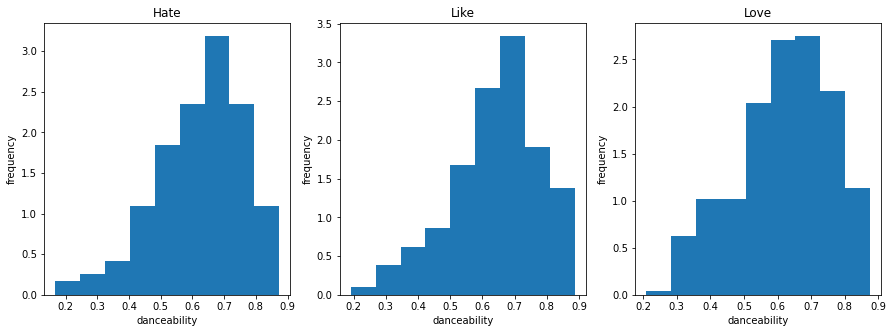

In [39]:
# Danceability
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.danceability, bins=CriaFaixa(hate.danceability), density=True)
plt.title('Hate')
plt.xlabel('danceability')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.danceability, bins=CriaFaixa(like.danceability), density=True)
plt.title('Like')
plt.xlabel('danceability')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.danceability, bins=CriaFaixa(love.danceability), density=True)
plt.title('Love')
plt.xlabel('danceability')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

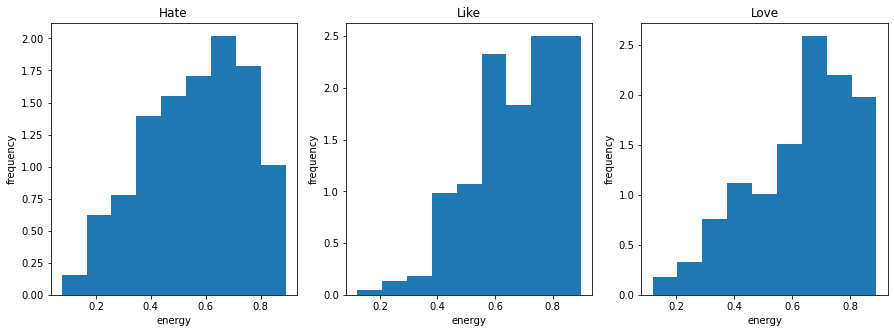

In [41]:
# Energy
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.energy, bins=CriaFaixa(hate.energy), density=True)
plt.title('Hate')
plt.xlabel('energy')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.energy, bins=CriaFaixa(like.energy), density=True)
plt.title('Like')
plt.xlabel('energy')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.energy, bins=CriaFaixa(love.energy), density=True)
plt.title('Love')
plt.xlabel('energy')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

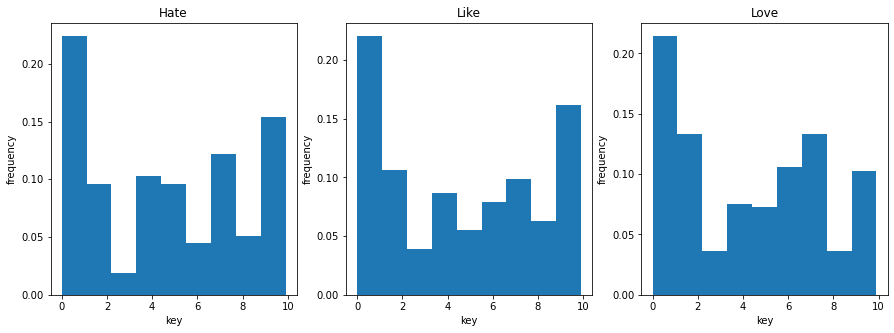

In [43]:
# Key
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.key, bins=CriaFaixa(hate.key), density=True)
plt.title('Hate')
plt.xlabel('key')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.key, bins=CriaFaixa(like.key), density=True)
plt.title('Like')
plt.xlabel('key')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.key, bins=CriaFaixa(love.key), density=True)
plt.title('Love')
plt.xlabel('key')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

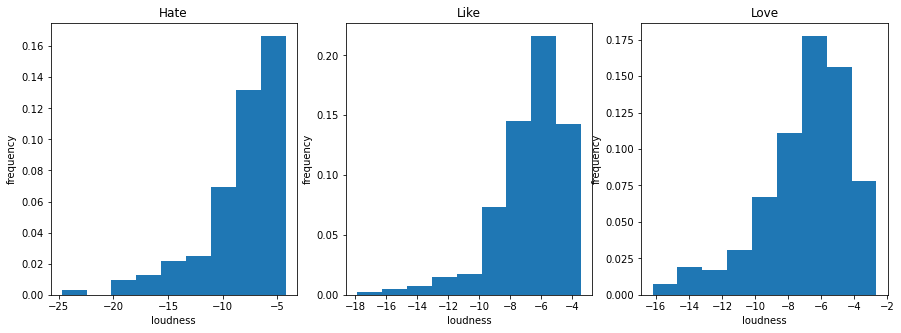

In [42]:
# Loudness
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.loudness, bins=CriaFaixa(hate.loudness), density=True)
plt.title('Hate')
plt.xlabel('loudness')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.loudness, bins=CriaFaixa(like.loudness), density=True)
plt.title('Like')
plt.xlabel('loudness')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.loudness, bins=CriaFaixa(love.loudness), density=True)
plt.title('Love')
plt.xlabel('loudness')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

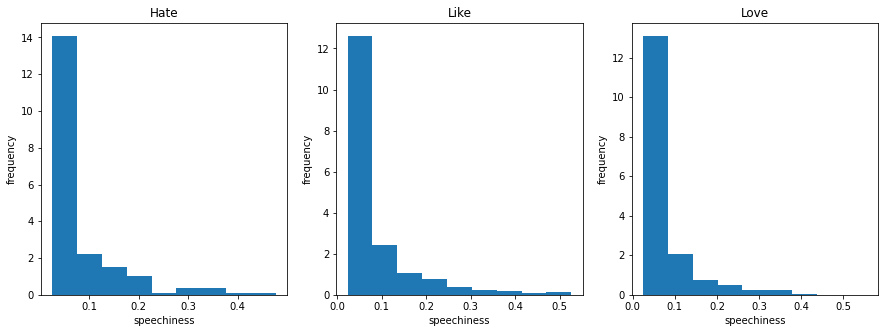

In [46]:
# Speechiness
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.speechiness, bins=CriaFaixa(hate.speechiness), density=True)
plt.title('Hate')
plt.xlabel('speechiness')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.speechiness, bins=CriaFaixa(like.speechiness), density=True)
plt.title('Like')
plt.xlabel('speechiness')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.speechiness, bins=CriaFaixa(love.speechiness), density=True)
plt.title('Love')
plt.xlabel('speechiness')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

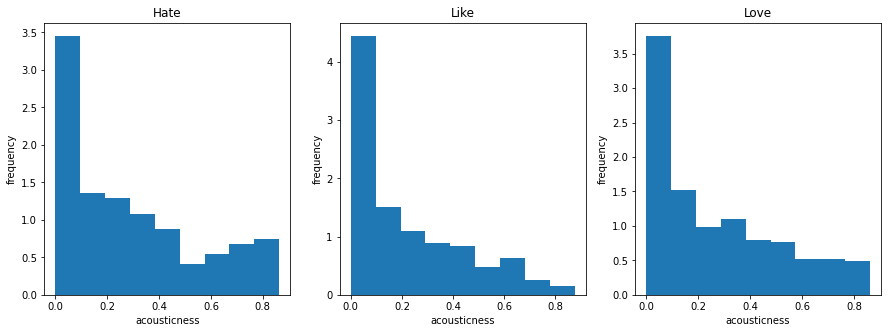

In [47]:
# Acousticness
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.acousticness, bins=CriaFaixa(hate.acousticness), density=True)
plt.title('Hate')
plt.xlabel('acousticness')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.acousticness, bins=CriaFaixa(like.acousticness), density=True)
plt.title('Like')
plt.xlabel('acousticness')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.acousticness, bins=CriaFaixa(love.acousticness), density=True)
plt.title('Love')
plt.xlabel('acousticness')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

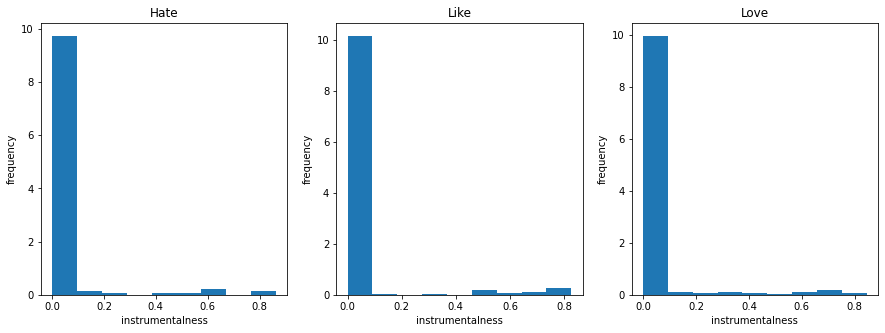

In [48]:
# Instrumentalness
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.instrumentalness, bins=CriaFaixa(hate.instrumentalness), density=True)
plt.title('Hate')
plt.xlabel('instrumentalness')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.instrumentalness, bins=CriaFaixa(like.instrumentalness), density=True)
plt.title('Like')
plt.xlabel('instrumentalness')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.instrumentalness, bins=CriaFaixa(love.instrumentalness), density=True)
plt.title('Love')
plt.xlabel('instrumentalness')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

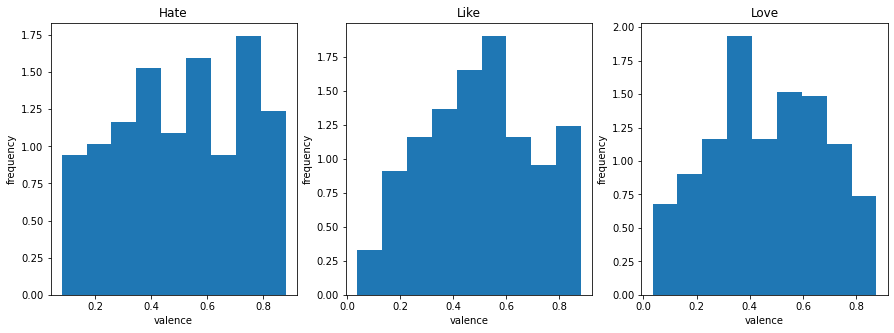

In [49]:
# Valence
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.valence, bins=CriaFaixa(hate.valence), density=True)
plt.title('Hate')
plt.xlabel('valence')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.valence, bins=CriaFaixa(like.valence), density=True)
plt.title('Like')
plt.xlabel('valence')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.valence, bins=CriaFaixa(love.valence), density=True)
plt.title('Love')
plt.xlabel('valence')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

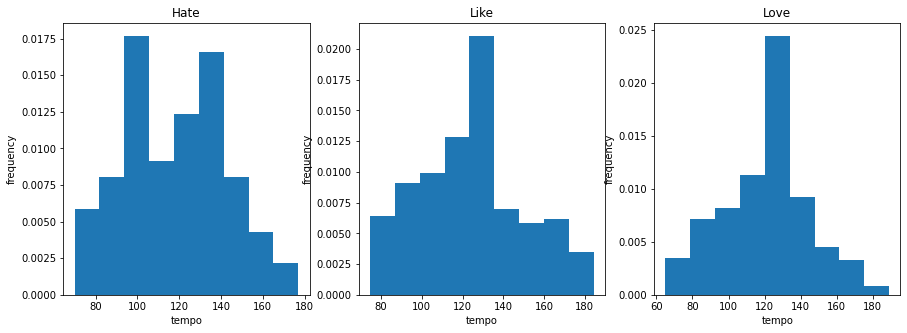

In [50]:
# Tempo
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.tempo, bins=CriaFaixa(hate.tempo), density=True)
plt.title('Hate')
plt.xlabel('tempo')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.tempo, bins=CriaFaixa(like.tempo), density=True)
plt.title('Like')
plt.xlabel('tempo')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.tempo, bins=CriaFaixa(love.tempo), density=True)
plt.title('Love')
plt.xlabel('tempo')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

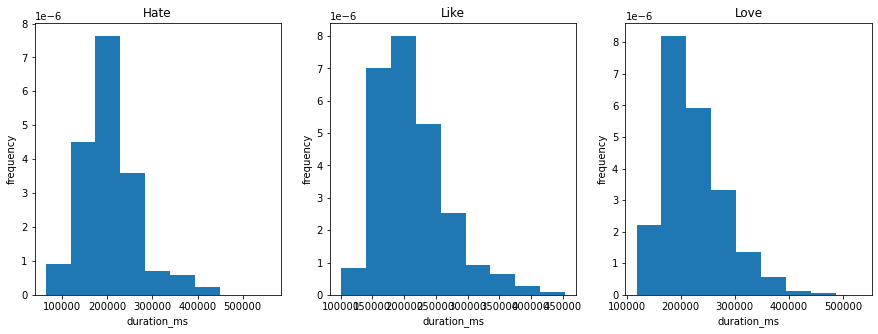

In [52]:
# Duration_ms
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.duration_ms, bins=CriaFaixa(hate.duration_ms), density=True)
plt.title('Hate')
plt.xlabel('duration_ms')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.duration_ms, bins=CriaFaixa(like.duration_ms), density=True)
plt.title('Like')
plt.xlabel('duration_ms')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.duration_ms, bins=CriaFaixa(love.duration_ms), density=True)
plt.title('Love')
plt.xlabel('duration_ms')
plt.ylabel('frequency')